**PROBLEM 2**

When finding the estimates for quantile regression out task is to minimize function: 

$F(\beta(q)| y, X)=\sum_{i:e_{i,q}	\geq 0} q|y_i-x'_i\beta(q)|+\sum_{i:e_{i,q}	\geq 0} (1+q)|y_i-x'_i\beta(q)|$ where $e_{i,q}=y_i+x'_i\beta(q)$. Let us apply this logic to the information from the setup. $F(\beta(q)| y, X)=\sum_{i:e_{i,q}	\geq 0} q|educ_i * \frac{e_{i,q}}{10}|+\sum_{i:e_{i,q}	\geq 0} (1+q)|educ_i * \frac{e_{i,q}}{10}|$. 

To minimize such a function we have to find the best constellation of variables from the function, i.e. $e_{i,q}, educ_i$ which works with preset $q$. 
We know that $q$ is between 0 and 1, therefore positive and the second part of the multiplication is in absolute value. The minimum value of the function $F$ can be desired with either $q$ or the absolute value set equal zero. 

In our case the estimates (derived from minimized function $F$) differ based on $q$ (up to our decision) and term $educ_i$, this changes their values. 

Naturally, if $q$ is changed estimates of $\beta(q)$ change, but in our opinion if we scale the data by a scalar $s$ the effect desribed by $\beta$ shall not change (based on basic econometric theory), but in our case the estimates will change. 

In [460]:
require(quantreg)
require(stargazer)
require(ggplot2)
require(gridExtra)

In [526]:
set.seed(666)

n = 500
m = 0
educ_range = c(1:10)
educ = sample(educ_range, n, replace = T)
epsilon = rnorm(n, sd=200) 

In [527]:
incomehetero = 4000 + 200 * educ + educ * epsilon/10 
dfhetero <- data.frame(incomehetero, educ, educ*epsilon/10)

In [528]:
incomehomo = 4000 + 200 * educ + epsilon/10
dfhomo <- data.frame(incomehomo, educ, epsilon/10)

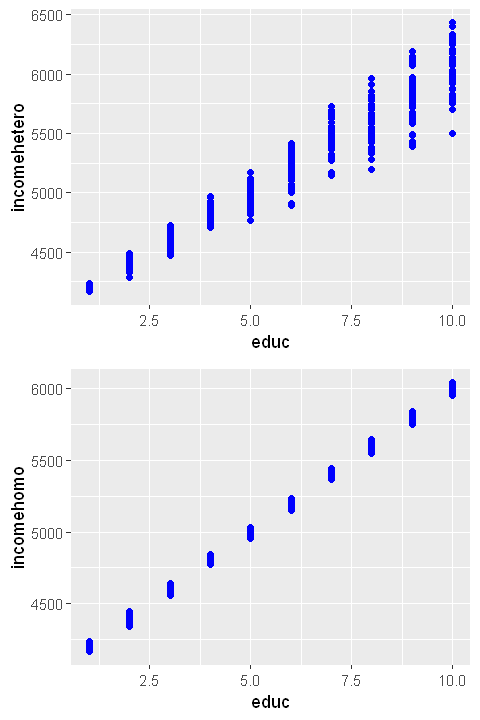

In [529]:
plothetero <- ggplot(dfhetero, aes(x = educ, y = incomehetero)) + geom_point(color = "blue")
plothomo <- ggplot(dfhomo, aes(x = educ, y = incomehomo)) + geom_point(color = "blue")
grid.arrange(plothetero, plothomo, ncol= 1)

In [530]:
heteromodel_25<-rq(incomehetero ~ educ, data = dfhetero,0.25)
heteromodel_50<-rq(incomehetero ~ educ, data = dfhetero,0.50)
heteromodel_75<-rq(incomehetero ~ educ, data = dfhetero,0.75)

In [531]:
homomodel_25<-rq(incomehomo ~ educ, data = dfhomo,0.25)
homomodel_50<-rq(incomehomo ~ educ, data = dfhomo,0.50)
homomodel_75<-rq(incomehomo ~ educ, data = dfhomo,0.75)

In [532]:
stargazer(heteromodel_25, heteromodel_50, heteromodel_75, title = "Quantile Regression: Heteroscedasticity",
          column.labels = c("First quartile", "Median", "Third quartile"),
          covariate.labels = c("Education", "Intercept"), dep.var.labels=c('Income'), type = "text")


Quantile Regression: Heteroscedasticity
                        Dependent variable:            
             ------------------------------------------
                               Income                  
             First quartile    Median    Third quartile
                  (1)           (2)           (3)      
-------------------------------------------------------
Education      186.992***    203.809***    215.287***  
                (2.199)       (1.956)       (2.320)    
                                                       
Intercept     3,995.916***  3,991.454***  3,996.768*** 
                (4.852)       (6.078)       (8.285)    
                                                       
-------------------------------------------------------
Observations      500           500           500      
Note:                       *p<0.1; **p<0.05; ***p<0.01


In [533]:
stargazer(homomodel_25, homomodel_50, homomodel_75, title = "Quantile Regression: Homoscedasticity",
          column.labels = c("First quartile", "Median", "Third quartile"),
          covariate.labels = c("Education", "Intercept"), dep.var.labels=c('Income'), type = "text")


Quantile Regression: Homoscedasticity
                        Dependent variable:            
             ------------------------------------------
                               Income                  
             First quartile    Median    Third quartile
                  (1)           (2)           (3)      
-------------------------------------------------------
Education      200.211***    200.653***    200.205***  
                (0.434)       (0.386)       (0.510)    
                                                       
Intercept     3,984.622***  3,997.096***  4,013.084*** 
                (2.483)       (2.586)       (3.543)    
                                                       
-------------------------------------------------------
Observations      500           500           500      
Note:                       *p<0.1; **p<0.05; ***p<0.01


**Commentary** <br>
We have run three quantile regressions (for all 3 quartiles) for both datasets with(out) heteroscedastic errors. <br> 
Regarding the homoscedastic dataset, the coefficient of education does not shift significantly (small shifts are due to sampling of educ values), however the intercept does. 
In case of the heteroscedastic dataset, the coefficient of education is positively correlated with the chosen quantile. We can also observe small changes in the intercept.

We have to bear in mind that the relationship between educ and income was already specified and is linear. Thus, the shift in the coefficient is purely due to heteroscedasticity. If the relationship was non-linear we would not be able to distinguish whether the shift of coefficients is due to heteroscedasticity or nonlinearity. Thus, if a non-linear relationship was found between an independent and the dependent variable, we would end up in the same situation as if we were using OLS and the solution to solve such problems would be quite similar (a better specification of the model, polynomials etc.). 

This is also shown graphically below. The three regressions lines are parallel in case of the homoscedastic dataset, i.e. the coefficient of education remains the same and the visible change is seen in the intercept. Whereas in heteroscadastic dataset, the lines are not parallel and will cross at a given point.

In [534]:
plothetero <- ggplot(dfhetero, aes(x = educ, y = incomehetero)) + geom_point(color = "blue") + geom_abline(intercept = heteromodel_25$coefficients[1], slope = heteromodel_25$coefficients[2], colour = "red")
plothetero <- plothetero + geom_abline(intercept = heteromodel_50$coefficients[1], slope = heteromodel_50$coefficients[2], colour = "red")
plothetero <- plothetero + geom_abline(intercept = heteromodel_75$coefficients[1], slope = heteromodel_75$coefficients[2], colour = "red")

In [535]:
plothomo <- ggplot(dfhomo, aes(x = educ, y = incomehomo)) + geom_point(color = "blue") + geom_abline(intercept = homomodel_25$coefficients[1], slope = homomodel_25$coefficients[2], colour = "red")
plothomo <- plothomo + geom_abline(intercept = homomodel_50$coefficients[1], slope = homomodel_50$coefficients[2], colour = "red")
plothomo <- plothomo + geom_abline(intercept = homomodel_75$coefficients[1], slope = homomodel_75$coefficients[2], colour = "red")

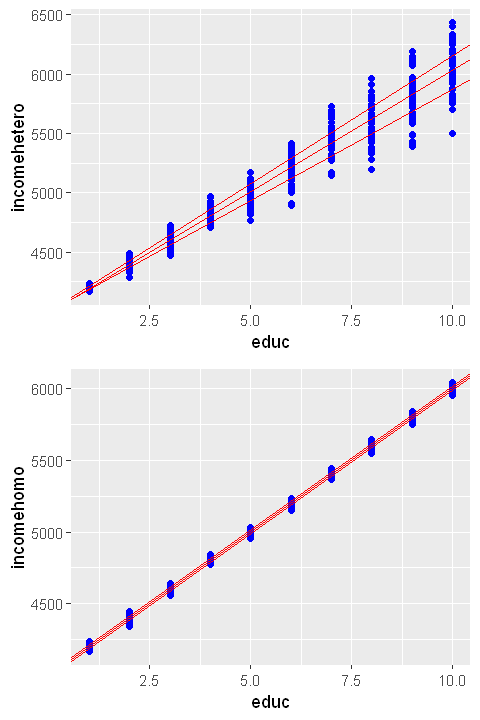

In [536]:
grid.arrange(plothetero, plothomo, ncol= 1)

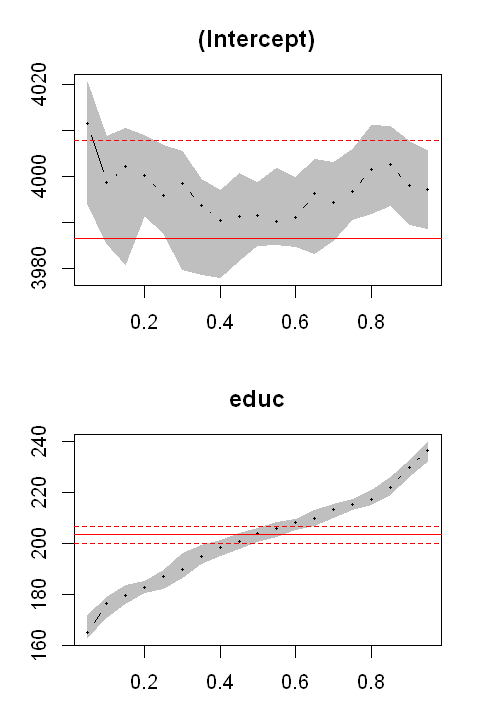

In [541]:
df <- dfhetero[1:2]
options(repr.plot.width=4, repr.plot.height=6)
plot(summary(rq(incomehetero ~ (educ), data=df, tau=seq(from=0.05, to=0.95, by=0.05))))

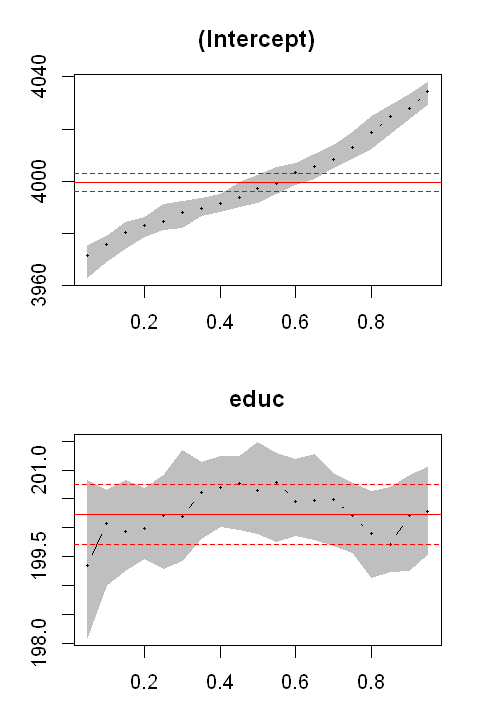

In [542]:
df <- dfhomo[1:2]
options(repr.plot.width=4, repr.plot.height=6)
plot(summary(rq(incomehomo ~ (educ), data=df, tau=seq(from=0.05, to=0.95, by=0.05))))